# Pembelajaran Mesin
## Dataset Iris Internal Sklearn
Oleh : Bervianto Leo P - 13514047 dan Muhammad Reifiza - 13514103

### Persiapan

* Melakukan import yang diperlukan

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
import pandas as pd
import graphviz 

* Mengambil atau men-load data iris internal dari sklearn.datasets

In [2]:
iris = load_iris()

* Visualisasi hubungan antar fitur

Agar mudah data yang digunakan yaitu pada seaborn sehingga struktur data sesuai dengan yang dibutuhkan untuk menggambar hubungan antar features. 

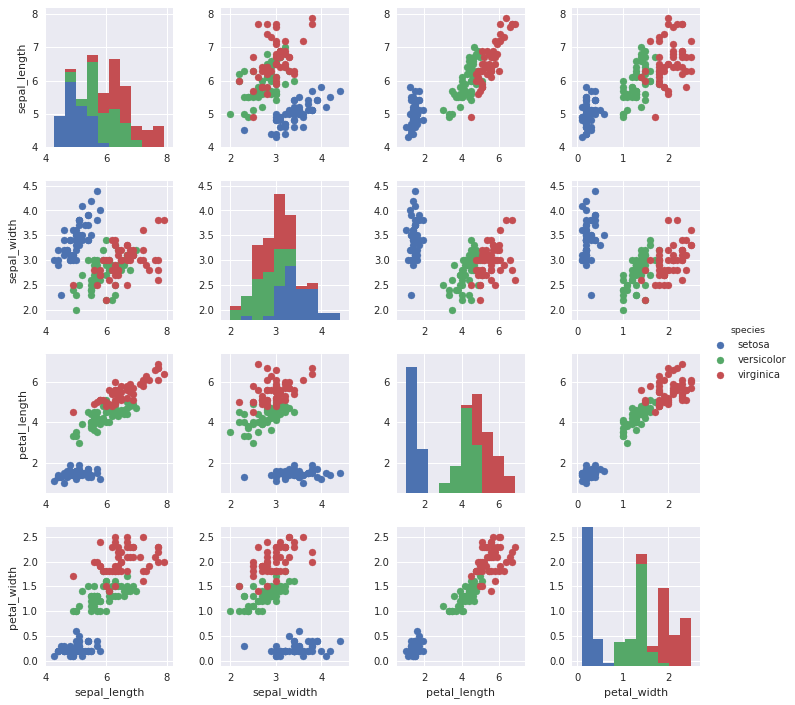

In [3]:
sns.set(color_codes=True)
iris_features = sns.load_dataset("iris")
g = sns.PairGrid(iris_features, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

### Pembelajaran dengan Full Training

* Melakukan pembelajaran full training dengan DTL

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* Hasil Pohon

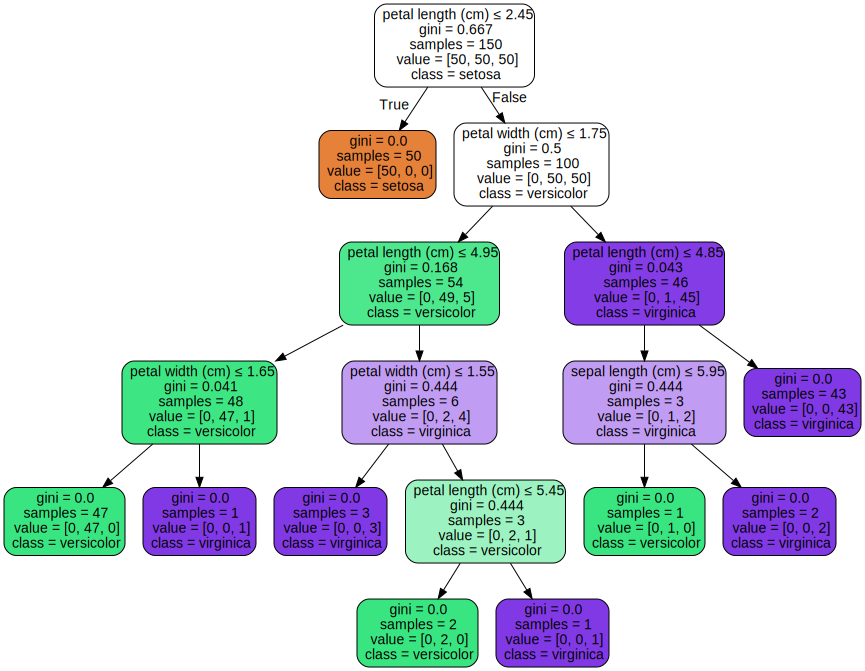

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

* Full training dengan ANN (Multi Layer Perceptron)

In [6]:
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(iris.data, iris.target)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

* Menampilkan weigth pada hidden layer

In [7]:
ann.coefs_

[array([[-0.13550239,  0.3597881 , -0.81630916, -0.3227893 , -0.57684476],
        [-0.66570776, -0.51233452, -0.25219808, -0.16857787,  0.06338741],
        [-0.1319547 ,  0.30246194, -0.48262707,  0.6174627 , -0.77177221],
        [ 0.27837206, -0.13504058,  0.09584001, -0.5872452 , -0.49299781]]),
 array([[ 0.73066898, -0.76834821],
        [-0.85350401, -0.61135478],
        [ 0.7001833 , -0.74371656],
        [-0.14608018,  0.84784599],
        [ 0.06141013,  0.35528709]]),
 array([[ 0.73312753, -1.05537667,  0.5480383 ],
        [ 1.07104013,  0.54370328, -0.48102273]])]

* Vector bias

In [8]:
ann.intercepts_

[array([ 0.49111382,  0.76466795, -0.30467704,  0.31406152,  0.61464091]),
 array([-0.34159867,  0.34533261]),
 array([-0.11660927, -0.11662606, -0.11643325])]

### Pembelajaran dengan Split Training

* Membagi data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10, random_state=42)

* Pembelajaran dengan DTL dan akurasinya

In [10]:
split = tree.DecisionTreeClassifier()
split = split.fit(X_train, y_train)
y_predict = split.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Akurasi: {} %'.format(accuracy * 100))

Akurasi: 100.0 %


* Fungsi untuk menggambarkan confusion matrix

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

* Hasil klasifikasi dengan DTL

In [12]:
print(classification_report(y_test, y_predict, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         6
 versicolor       1.00      1.00      1.00         6
  virginica       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        15



* Confusion Matrix pada DTL

Confusion matrix, without normalization
[[6 0 0]
 [0 6 0]
 [0 0 3]]


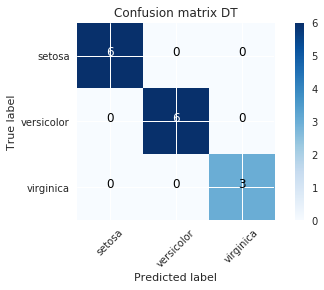

In [13]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Confusion matrix DT')

* Pembelajaran dengan ANN dan akurasinya

In [14]:
ann_split = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann_split.fit(X_train, y_train)
y_ann_predict = ann_split.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_ann_predict)
print('Akurasi: {} %'.format(accuracy_ann * 100))

Akurasi: 20.0 %


* Hasil klasifikasi dengan ANN

In [15]:
print(classification_report(y_test, y_ann_predict, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       0.00      0.00      0.00         6
 versicolor       0.00      0.00      0.00         6
  virginica       0.20      1.00      0.33         3

avg / total       0.04      0.20      0.07        15



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* Confusion Matrix pada ANN

Confusion matrix, without normalization
[[0 0 6]
 [0 0 6]
 [0 0 3]]


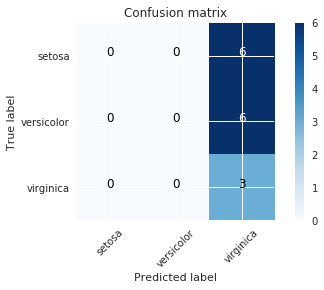

In [16]:
cnf_matrix_ann = confusion_matrix(y_test, y_ann_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix_ann, classes=iris.target_names,
                      title='Confusion matrix')

### Pembelajaran dengan 10-fold cross validation

* Pembelajaran dengan DTL

In [17]:
scores = cross_val_score(clf, iris.data, iris.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.09)


* Pembelajaran dengan ANN

In [18]:
scores = cross_val_score(ann, iris.data, iris.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.00)


### Melakukan Save Model

In [19]:
from sklearn.externals import joblib
joblib.dump(clf, 'full_train_dtl.pkl')
joblib.dump(ann, 'full_train_ann.pkl')

['full_train_ann.pkl']

### Melakukan Load Model

In [20]:
loaded_model_dtl = joblib.load('full_train_dtl.pkl') 
loaded_model_ann = joblib.load('full_train_ann.pkl')

### Predict New Instance

* New Instance

In [21]:
new_instance = []
for iris_attr in iris.feature_names:
    value = input("Value for "+iris_attr+": ")
    new_instance.append(value)

print(new_instance)

Value for sepal length (cm): 5.1
Value for sepal width (cm): 3.5
Value for petal length (cm): 1.4
Value for petal width (cm): 0.2
['5.1', '3.5', '1.4', '0.2']


* Predict with DTL

In [22]:
instance = []
instance.append(new_instance)
loaded_model_dtl.predict(instance)

array([0])

* Predict with ANN

In [23]:
instance_in_float = [float(i) for i in new_instance]
instance_ann = []
instance_ann.append(instance_in_float)
loaded_model_ann.predict(instance_ann)

array([2])